In [52]:
pip install scikit-learn seaborn

In [1]:
import pandas as pd 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
chunksize = 10 ** 5
data=pd.read_csv("X_train_Hi5.csv",chunksize=chunksize)

In [5]:
# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = 'X_train_Hi5.csv'

chunksize = 100_000
chunks = pd.read_csv(csv_file_path, chunksize=chunksize)


In [6]:
h= None
for chunk in chunks:
    chunk.head(10)  # Display first 10 rows of the first chunk
    h = chunk.head(10)
    break  # Stop after processing the first chunk"

valeurs nan

In [7]:
list_nan=[]
for i in chunk.columns:
    if chunk[i].isnull().values.any()==True:
        list_nan.append(i)
len(list_nan),list_nan

(96,
 ['piezo_station_investigation_depth',
  'piezo_station_pe_label',
  'piezo_station_bdlisa_codes',
  'piezo_producer_code',
  'piezo_producer_name',
  'piezo_measure_nature_code',
  'piezo_measure_nature_name',
  'meteo_rain_height',
  'meteo_DRR',
  'meteo_temperature_min',
  'meteo_time_tn',
  'meteo_temperature_max',
  'meteo_time_tx',
  'meteo_temperature_avg',
  'meteo_temperature_avg_threshold',
  'meteo_temperature_min_ground',
  'meteo_temperature_min_50cm',
  'meteo_frost_duration',
  'meteo_amplitude_tn_tx',
  'meteo_temperature_avg_tntm',
  'meteo_pressure_avg',
  'meteo_pression_maxi',
  'meteo_wind_speed_avg_10m',
  'meteo_wind_max',
  'meteo_wind_direction_max_inst',
  'meteo_time_wind_max',
  'meteo_wind_avg',
  'meteo_wind_direction_max_avg',
  'meteo_time_wind_avg',
  'meteo_wind_speed_avg_2m',
  'meteo_wind_max_2m',
  'meteo_wind_direction_max_inst_2m',
  'meteo_time_wind_max_2m',
  'meteo_wind_max_3s',
  'meteo_time_wind_max_3s',
  'meteo_humidity_min',
  'meteo

In [8]:
percent_missing = chunk.isnull().sum() * 100 / len(chunk)

In [9]:
percent_missing[percent_missing!=0.0][0:7]
#percent_missing[percent_missing!=0.0].sort_values(ascending=False)[:20]

piezo_station_investigation_depth    6.114
piezo_station_pe_label               8.083
piezo_station_bdlisa_codes           4.864
piezo_producer_code                  5.720
piezo_producer_name                  5.720
piezo_measure_nature_code            4.362
piezo_measure_nature_name            4.362
dtype: float64

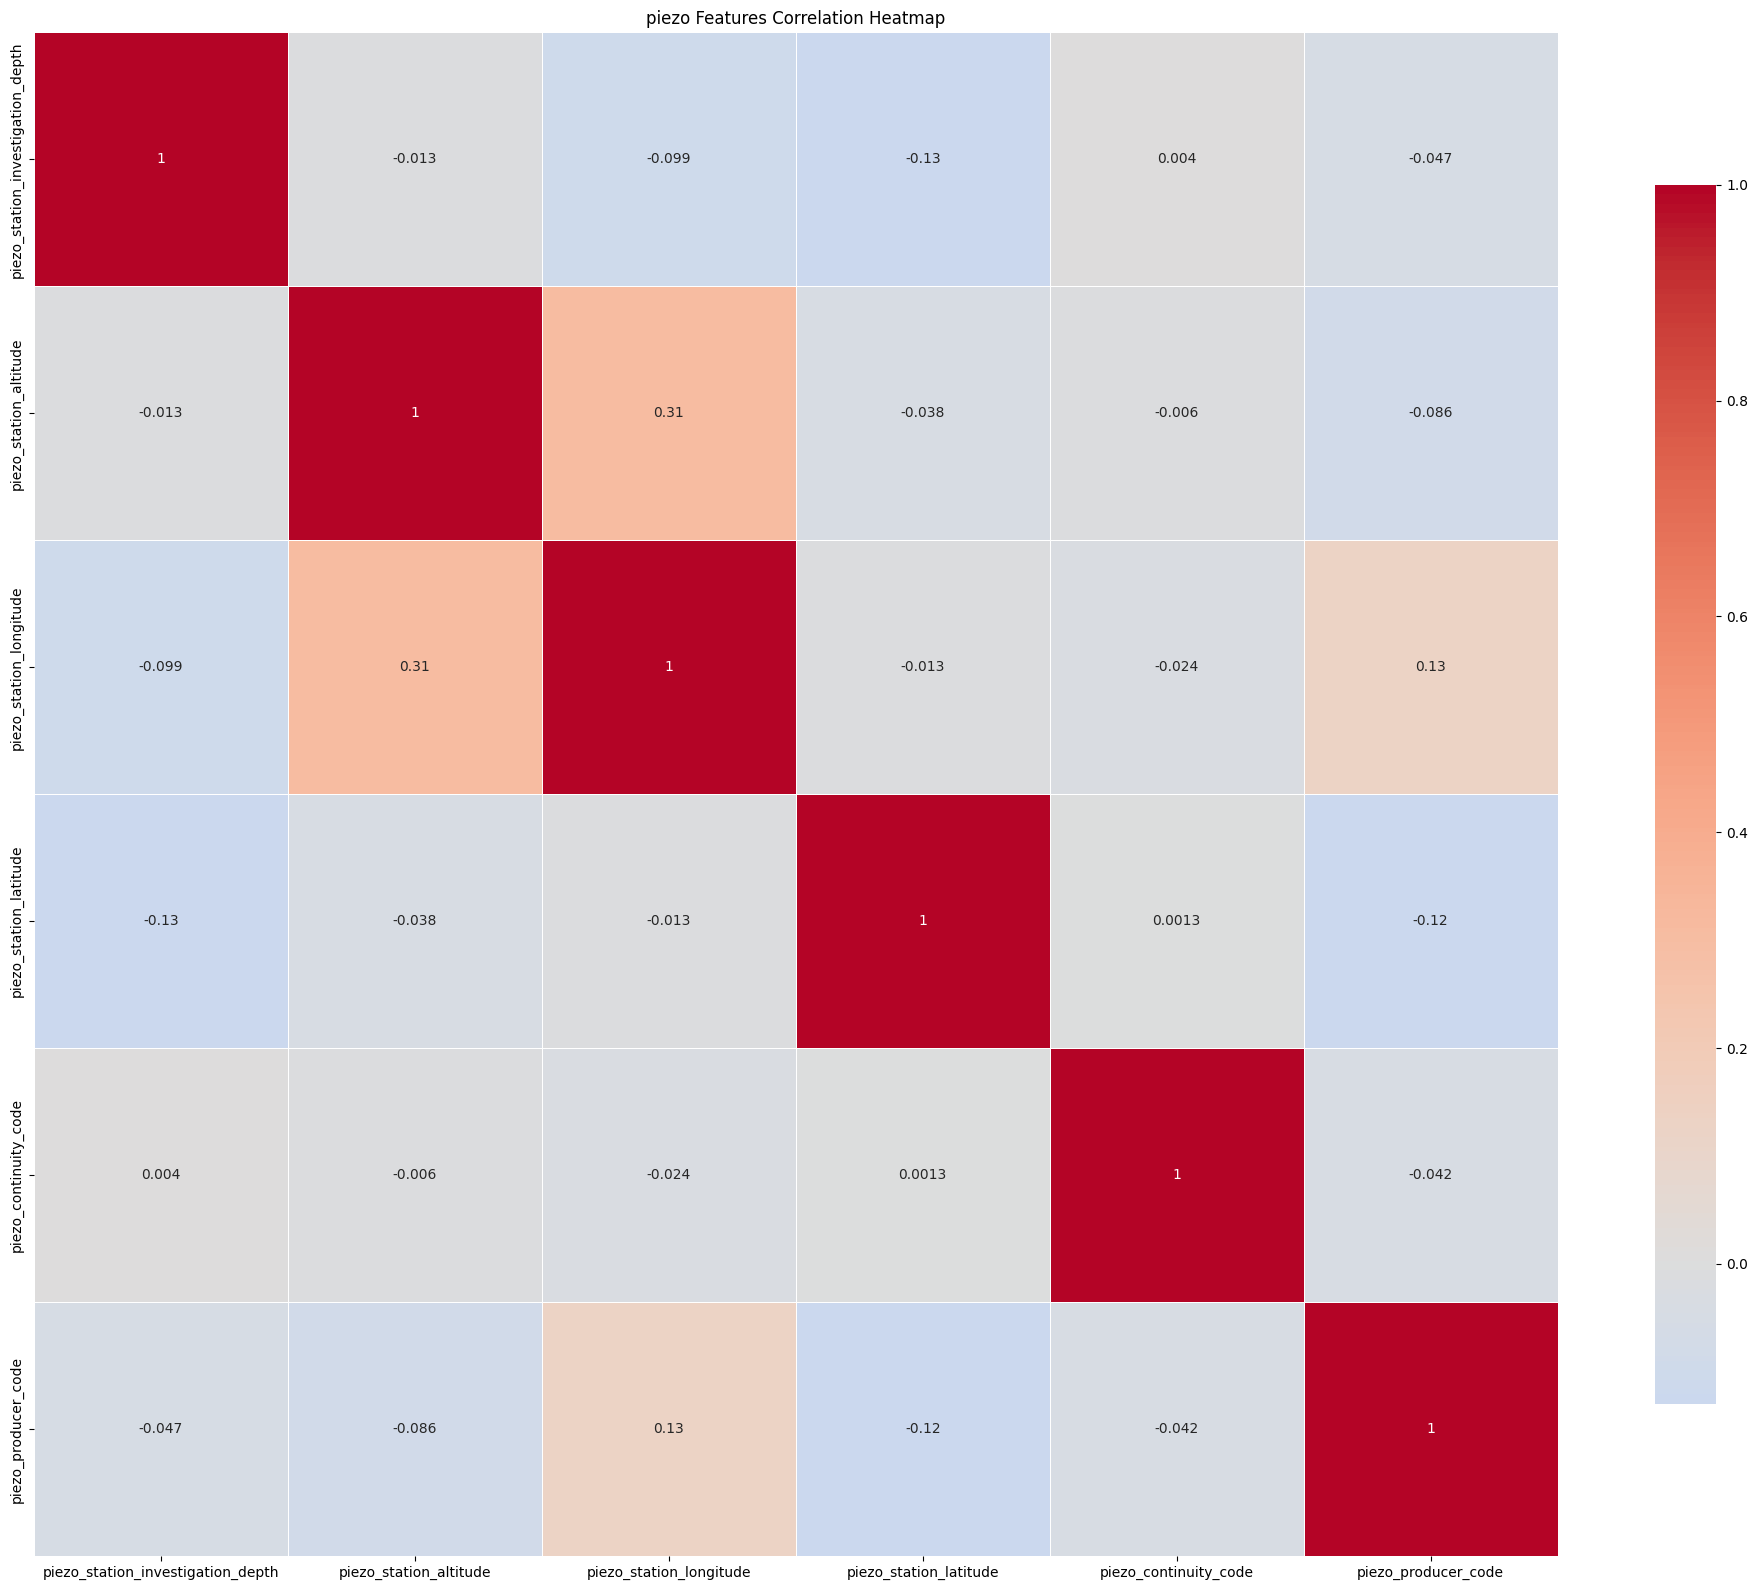


Highly Correlated Features:


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric piezo features
piezo_numeric_features = chunk.select_dtypes(include=['float64', 'int64'])
piezo_numeric_features = piezo_numeric_features.loc[:, piezo_numeric_features.columns.str.startswith('piezo_')]


correlation_matrix = piezo_numeric_features.corr()


plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center color at 0
            square=True,  # Make plot square
            linewidths=0.5,  # Add lines between cells
            cbar_kws={"shrink": .8})  # Adjust colorbar size
plt.title('piezo Features Correlation Heatmap')
plt.tight_layout()
plt.show()

print("\nHighly Correlated Features:")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > 0.7:  
                print(f"{col1} and {col2}: {corr_value}")

fill les na de piezo_station_investigation_depth avec le median

In [11]:
chunk['piezo_station_investigation_depth'].fillna(
    chunk['piezo_station_investigation_depth'].median(), 
    inplace=True
)

C:\Users\vongp\AppData\Local\Temp\ipykernel_8224\887467646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk['piezo_station_investigation_depth'].fillna(


In [12]:
chunk['piezo_measure_nature_code'].value_counts(normalize=True)

piezo_measure_nature_code
0    0.571781
N    0.381951
I    0.040998
D    0.005270
Name: proportion, dtype: float64

Features qu'on garde

In [13]:
piezo_important_cols=['piezo_station_investigation_depth','piezo_station_altitude','piezo_station_bss_code','piezo_station_longitude','piezo_station_latitude','piezo_measurement_date','piezo_obtention_mode','piezo_status','piezo_qualification','piezo_continuity_code','piezo_producer_name','piezo_measure_nature_name']

encodage piezo_producer_name


In [14]:
# Encodage
chunk['producer_name_encoded'] = chunk['piezo_producer_name'].factorize()[0]

# Fréquence 
producer_freq = chunk['piezo_producer_name'].value_counts(normalize=True)

In [15]:
chunk[chunk['piezo_producer_name'].isnull()]

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category,producer_name_encoded
113,113,06,Fri Jun 28 07:31:38 CEST 2024,70.0,Alpes-Maritimes,06027,Asa Val de Cagne,['569AE00'],53.00,09994X0535/PZ_ASA,...,43.901261,6078.0,9.446073e+08,0.1,52580.0,23940,5.3,7.8,Very High,-1
120,120,06,Fri Jun 28 07:31:38 CEST 2024,390.0,Alpes-Maritimes,06006,Roguez,['563AE00'],134.00,09735X0221/PZ_ROG,...,43.901261,6078.0,1.036476e+09,0,2300.0,29450,10.5,24.6,Very High,-1
126,126,06,Fri Jun 28 07:31:38 CEST 2024,190.0,Alpes-Maritimes,06044,Rougières,NaN,60.00,09994X0537/PZ_ROU,...,43.854155,6021.0,1.816876e+08,0.7,8084.0,29030,3.6,10,Very High,-1
176,176,11,Mon Sep 16 17:18:47 CEST 2024,38.0,Aude,11148,source de Font calel,['681AQ03'],88.00,10602X0001/111111,...,43.198967,11068.0,7.581636e+08,30.8,567.0,21070,0,25.6,Very High,-1
177,177,11,Tue Sep 17 15:18:42 CEST 2024,30.0,Aude,11212,"PIÉZOMÈTRE PZ1 (MAILHAC,11)",['334AJ07'],76.67,10384X0073/PZ1,...,43.261030,11393.0,4.454169e+08,25.9,581.0,19200,14.8,3.7,High,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99948,105119,30,Sun Sep 11 13:00:01 CEST 2022,12.0,Gard,30060,CAISSARGUES (PIEZO),['647AA01'],30.00,09655X0266/CAISSA,...,43.710288,30117.0,7.713927e+07,3,4097.0,24320,5.3,8.8,Average,-1
99951,105122,30,Sun Sep 11 13:00:01 CEST 2022,38.0,Gard,30333,UCHAUD (PIEZO),['647AA01'],15.00,09648X0082/UCHAUD,...,43.547147,30341.0,6.102203e+07,0.5,4761.0,21440,1.9,9.1,Average,-1
99954,105125,30,Sun Sep 11 13:00:01 CEST 2022,25.0,Gard,30059,PERRIER (PIEZO),['647AA01'],10.00,09914X0370/PERRIE,...,43.547147,30341.0,5.580631e+07,28.4,2517.0,23320,4.2,1.6,Average,-1
99961,105132,30,Fri Jun 28 07:31:38 CEST 2024,38.0,Gard,30356,Lycée Rodilhan - 61241,['647AA01'],46.02,09656X0175/RODIL,...,43.723818,30117.0,2.378854e+08,0.2,2821.0,23140,20.6,16.9,Low,-1
